**Tabla de contenido**

- [Implementando un modelo lineal](#Implementando-un-modelo-lineal)
    - [Implementando un modelo lineal de un solo paso](#Implementando-un-modelo-lineal-de-un-solo-paso)
    - [Implementación de un modelo lineal de varios pasos](#Implementacion-de-un-modelo-lineal-de-varios-pasos)
    - [Implementación de un modelo lineal de múltiples salidas](#Implementacion-de-un-modelo-lineal-de-multiples-salidas)
- [Implementación de una red neuronal profunda](#Implementacion-de-una-red-neuronal-profunda)
    - [Implementar una red neuronal profunda como un modelo de un solo paso](#Implementar-una-red-neuronal-profunda-como-un-odelo-de-un-solo-paso)
    - [Implementación de una red neuronal profunda como modelo de varios pasos](Implementacion-de-una-red-neuronal-profunda-como-modelo-de-varios-pasos)

En el último capítulo, implementamos la clase DataWindow, que nos permite crear rápidamente ventanas de datos para construir modelos de un solo paso, modelos de múltiples pasos y modelos de múltiples salidas. Con este componente crucial en su lugar, luego desarrollamos los modelos base que servirán como puntos de referencia para nuestros modelos más complejos, que comenzaremos a construir en este capítulo.

Específicamente, implementaremos modelos lineales y redes neuronales profundas. Un modelo lineal es un caso especial de una red neuronal, donde no hay capa oculta. Este modelo simplemente calcula pesos para cada variable de entrada con el fin de generar una predicción para el objetivo. En contraste, una red neuronal profunda tiene al menos una capa oculta, lo que nos permite comenzar a modelar relaciones no lineales entre las características y el objetivo, lo que generalmente resulta en mejores pronósticos.

En este capítulo, continuaremos el trabajo que comenzamos en el capítulo 13. Te recomiendo que sigas programando en el mismo cuaderno o en los mismos scripts de Python que en el capítulo anterior, para que puedas comparar el rendimiento de estos modelos lineales y redes neuronales profundas con el de los modelos de referencia del capítulo 13. También seguiremos trabajando con el mismo conjunto de datos que anteriormente, y nuestra variable objetivo seguirá siendo el volumen de tráfico tanto para los modelos de un solo paso como para los de múltiples pasos. Para el modelo de múltiples salidas, mantendremos la temperatura y el volumen de tráfico como nuestros objetivos.


# Implementando un modelo lineal

`Un modelo lineal es la arquitectura más simple que podemos implementar en el aprendizaje profundo`. De hecho, podríamos argumentar que no es aprendizaje profundo en absoluto, ya que el modelo no tiene una capa oculta. Cada característica de entrada simplemente se le asigna un peso y se combinan para generar una predicción para el objetivo, al igual que en una regresión lineal tradicional.

Consideremos un modelo de un solo paso como ejemplo. Recuerde que tenemos las siguientes características en nuestro conjunto de datos: temperatura, cobertura de nubes, volumen de tráfico y day_sin y day_cos, que codifican el la hora del día como valores numéricos. Un modelo lineal simplemente toma todas las características, calcula un peso para cada una de ellas y las suma para generar una predicción para el siguiente paso de tiempo, como se ve en la siguiente figura.

![Modelo lineal](fig/modelo_lineal.png)

El modelo en la figura se puede expresar matemáticamente como: $$traffic volume_{t+1} = w_1x_{1,t} + w_2x_{2,t} + w_3x_{3,t} + w_4x_{4,t} + w_5x_{5,t}$$ donde $x_1$ es la cobertura de nubes, $x_2$ es la temperatura, $x_3$ es el volumen de tráfico, $x_4$ es day_sin, y $x_5$ es day_cos.

Podemos reconocer fácilmente la ecuación como una simple regresión lineal multivariante. Durante el entrenamiento, el modelo prueba múltiples valores para w1 a w5 con el fin de minimizar el error cuadrático medio (MSE) entre la predicción y el valor real del volumen de tráfico en el siguiente instante de tiempo.

Ahora que entiendes el concepto de un modelo lineal en aprendizaje profundo, implementémoslo como un modelo de un solo paso, un modelo de múltiples pasos y un modelo de múltiples salidas.

# Implementando un modelo lineal de un solo paso

Un modelo lineal de un solo paso es uno de los modelos más simples de implementar, ya que es exactamente como se describe en la figura 14.1 y la ecuación 14.1. Simplemente tomamos todas las entradas, asignamos un peso a cada una, sumamos y generamos una predicción. Recuerda que estamos utilizando el volumen de tráfico como objetivo.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

file_path = lambda file: os.path.join(os.getcwd(),'data',file)
train_df = pd.read_csv(file_path('train.csv'))
val_df = pd.read_csv(file_path('val.csv'))
test_df = pd.read_csv(file_path('test.csv'))

`Clase Datawindow`


La clase se basa en el ancho de la entrada (input_width), el ancho de la etiqueta (label_width) y el desplazamiento (shift). El ancho de la entrada es simplemente el número de pasos de tiempo que se introducen en el modelo para hacer predicciones. Por ejemplo, dado que tenemos datos horarios en nuestro conjunto de datos, si alimentamos al modelo con 24 horas de datos para hacer una predicción, el ancho de la entrada es 24. Si alimentamos solo 12 horas de datos, el ancho de la entrada es 12.

El ancho de la etiqueta (label_width) es equivalente al número de pasos de tiempo en las predicciones. Si predecimos solo un paso de tiempo, el ancho de la etiqueta (label_width) es 1. Si predicimos un día completo de datos (con datos horarios), el ancho de la etiqueta (label_width) es 24.

Finalmente, el desplazamiento (shift) es el número de pasos de tiempo que separan la entrada de las predicciones. Si predecimos el siguiente paso de tiempo, el desplazamiento (shift) es 1. Si predecimos las próximas 24 horas (con datos horarios), el desplazamiento (shift) es 24. 


1. Nombre de la columna que deseamos predecir
2. Cree un diccionario con el nombre y el índice de la columna etiqueta. Esto se usará para trazar.
3. Cree un diccionario con el nombre y el índice de cada columna. Esto se usará para separar las entidades de la variable de destino.
4. La función de división devuelve un objeto de división que especifica cómo dividir una secuencia. En este caso, dice
que el segmento de entrada comienza en 0 y termina cuando alcanzamos el input_width.
5. Asigne índices a las entradas. Estos son útiles para trazar.
6. Obtenga el índice en el que comienza la etiqueta. En este caso, es el tamaño total de la ventana menos el ancho de la etiqueta.
7. Los mismos pasos que se aplicaron para las entradas se aplican para las etiquetas.
8. Corta la ventana para obtener las entradas usando el input_slice definido en __init__.
9. Corta la ventana para obtener las etiquetas usando labels_slice definido en __init__.
10. Si tenemos más de un objetivo, apilamos las etiquetas.
11. La forma será [lote, tiempo, características]. En este punto, solo especificamos la dimensión de tiempo y permitimos que las dimensiones de lote y características se definan más tarde.
12. Plotea las entradas. Aparecerán como una línea continua azul con puntos.
13. Grafique las etiquetas o los valores reales. Aparecerán como cuadrados verdes.
14. Traza las predicciones. Aparecerán como cruces rojas.

`Función que crea los tensores`


15. Pase los datos. Esto corresponde a nuestro conjunto de entrenamiento, conjunto de validación o conjunto de prueba.
16. Los objetivos se establecen en Ninguno, ya que son manejados por la función split_to_input_labels.
17. Define la longitud total del arreglo, que es igual a la longitud total de la ventana.
18. Define el número de pasos de tiempo que separan cada secuencia. En nuestro caso, queremos que las secuencias sean consecutivas, así que sequence_stride=1.
19. Baraja las secuencias. Ten en cuenta que los datos aún están en orden cronológico. Simplemente estamos cambiando el orden de las secuencias, lo que hace que el modelo sea más robusto.
20. Defina el número de secuencias en un solo lote. Recuerda que estamos reorganizando las secuencias en un lote. Esto significa que dentro de cada secuencia, los datos están en orden cronológico. Sin embargo, en un lote de 32 secuencias, podemos y debemos barajarlas para hacer que nuestro modelo sea más robusto y menos propenso al sobreajuste.

21. Obtenga un lote de muestra de datos para fines de representación gráfica. Si el lote de muestra no existe, recuperaremos un lote de muestra y lo almacenaremos en caché.

In [14]:
import numpy as np
import tensorflow as tf
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, 
                 test_df=test_df,label_columns=None):
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns #1
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)} #2
        
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)} #3

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width) #4

        self.input_indices = np.arange(self.total_window_size)[self.input_slice] #5 
        self.label_start = self.total_window_size - self.label_width #6

        self.labels_slice = slice(self.label_start, None) #7 
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :] # 8
        labels = features[:, self.labels_slice, :] # 9

        if self.label_columns is not None: # 10 
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )

        inputs.set_shape([None, self.input_width, None]) #11 
        labels.set_shape([None, self.label_width, None])
        return inputs, labels
    # Método para trazar una muestra de ventanas de datos
    def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
        inputs, labels = self.sample_batch
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10) # 12
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col,None)
            else:
                label_col_index = plot_col_index
            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels',c='green', s=64) # 13
            
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :,label_col_index],marker='X', 
                            edgecolors='k', label='Predictions',c='red', s=64) #14
            if n == 0:
                plt.legend()
            plt.xlabel('Time (h)')
        
    # Función que crea los tensores con los datos temporales
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,                              # 15
            targets=None,                           #16
            sequence_length=self.total_window_size, #17
            sequence_stride=1,                      #18
            shuffle=True,                           #19
            batch_size=32                           #20
        )
        ds = ds.map(self.split_to_inputs_labels)
        return ds
    """ 
    Concluiremos nuestra clase DataWindow definiendo algunas propiedades para aplicar 
    la función make_dataset en los conjuntos de entrenamiento, validación y prueba. 
    También crearemos un lote de muestra que almacenaremos en caché dentro de la clase para fines de trazado.
    """
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    @property
    def sample_batch(self):                          #21
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

A diferencia de un modelo de referencia, un modelo lineal realmente requiere entrenamiento. Por lo tanto, definiremos una función compile_and_fit que configura el modelo para el entrenamiento y luego ajusta el modelo a los datos, como se muestra en la siguiente lista.

1. La función toma un modelo y una ventana de datos de la clase DataWindow. La paciencia (patience) es el número de épocas después de las cuales el modelo debe dejar de entrenarse si la pérdida de validación no mejora; max_epochs establece un número máximo de épocas para entrenar el modelo.
2. Se rastrea la pérdida de validación para determinar si debemos aplicar la detención temprana o no.
3. El paro temprano ocurre si 3 épocas consecutivas no disminuyen la pérdida de validación, según lo establecido por el parámetro de paciencia.
4. El MSE se utiliza como la función de pérdida.
5. El MAE se utiliza como una métrica de error. Así es como comparamos el rendimiento de nuestros modelos. Un MAE más bajo significa un mejor modelo.
6. El modelo es ajustado al conjunto de entrenamiento.
7. El modelo puede entrenar un máximo de 50 épocas, según lo establecido por el parámetro max_epochs.
8. Utilizamos el conjunto de validación para calcular la pérdida de validación.
9. early_stopping se pasa como un callback. Si la pérdida de validación no disminuye después de 3 épocas consecutivas, el modelo deja de entrenar. Esto evita el sobreajuste.


In [3]:
# Función para configurar un modelo de aprendizaje profundo y ajustarlo a los datos
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

def compile_and_fit(model, window, patience=3, max_epochs=50): #1
    early_stopping = EarlyStopping(monitor='val_loss', #2
                                   patience=patience, #3
                                   mode='min')
    model.compile(loss=MeanSquaredError(), #4
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()]) #5
    
    history = model.fit(window.train, #6
                        epochs=max_epochs,#7
                        validation_data=window.val,#8
                        callbacks=[early_stopping]) #9
    return history


Este fragmento de código se reutilizará a lo largo de los capítulos de aprendizaje profundo, por lo que es importante entender qué está sucediendo. La función compile_and_fit toma un modelo de aprendizaje profundo, una ventana de datos de la clase DataWindow, el parámetro de paciencia y el parámetro max_epochs. El parámetro de paciencia se utiliza en la función early_stopping, que nos permite detener el entrenamiento del modelo si no hay mejoras en la pérdida de validación, como se especifica en el parámetro monitor. De esta manera, evitamos tiempo de entrenamiento inútil y sobreajuste.

Luego se compila el modelo. En Keras, esto simplemente configura el modelo para especificar la función de pérdida a utilizar, el optimizador y las métricas de evaluación. En nuestro caso, usaremos el MSE como función de pérdida porque el error se eleva al cuadrado, lo que significa que el modelo es severamente penalizado por grandes diferencias entre los valores predichos y los reales. Usaremos el optimizador Adam porque es un optimizador rápido y eficiente. Finalmente, usaremos el MAE como métrica de evaluación para comparar el rendimiento de nuestros modelos porque lo usamos para evaluar nuestros modelos de referencia en el capítulo anterior, y es fácil de interpretar.

El modelo se ajusta a los datos de entrenamiento durante hasta 50 épocas, según lo establecido por el parámetro max_epochs. La validación se realiza en el conjunto de validación, y pasamos early_stopping como una devolución de llamada. De esa manera, Keras aplicará el paro temprano si observa que la pérdida de validación no ha disminuido después de 3 épocas consecutivas.

Con compile_and_fit listo, podemos pasar a construir nuestro modelo lineal. Usaremos el modelo Secuencial de Keras, ya que nos permite apilar diferentes capas. Dado que estamos construyendo un modelo lineal aquí, solo tenemos una capa: una capa Densa, que es la capa más básica en el aprendizaje profundo. Especificaremos el número de unidades como 1, ya que el modelo debe devolver solo un valor: la predicción del volumen de tráfico en el siguiente paso de tiempo.

In [4]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense
linear = Sequential([Dense(units=1)])

Ahora, definamos las ventanas de datos, en este caso input_width es 1, lo que indica que le estamos pasando un solo valor temporal. Label_width es 1, lo que indica que indica el numero de pasos a predecir. Y finalmente shift es 1, indicando que solo hay un paso de separación entre las entradas y la predicción.

1. Crea un diccionario para contener el MAE de un modelo en el conjunto de validación.
2. Crea un diccionario para contener el MAE de un modelo en el conjunto de prueba.

Claramente, Keras hace que sea muy fácil construir modelos. Una vez completado este paso, podemos entrenar el modelo usando compile_and_fit y almacenar el rendimiento para luego compararlo con la línea de base.

In [5]:
single_step_window = DataWindow(input_width=1, label_width=1, shift=1,label_columns=['traffic_volume'])

val_performance = {} #1
performance = {} #2

history = compile_and_fit(linear, single_step_window)
val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

I0000 00:00:1752093222.631811   69129 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 668 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


Epoch 1/50


I0000 00:00:1752093223.986075   69196 service.cc:152] XLA service 0x7d1abc006c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752093223.986094   69196 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 with Max-Q Design, Compute Capability 7.5
2025-07-09 15:33:44.000056: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752093224.040946   69196 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752093224.181340   69196 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1510556.7500 - mean_absolute_error: 996.8856 - val_loss: 71176.9062 - val_mean_absolute_error: 266.0905
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6165.7612 - mean_absolute_error: 57.7305 - val_loss: 5.5808 - val_mean_absolute_error: 2.2944
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5331 - mean_absolute_error: 0.5733 - val_loss: 0.2979 - val_mean_absolute_error: 0.4453
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2585 - mean_absolute_error: 0.4160 - val_loss: 0.2965 - val_mean_absolute_error: 0.4443
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2581 - mean_absolute_error: 0.4157 - val_loss: 0.2968 - val_mean_absolute_error: 0.4445
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2572 - mean_absolute_error: 0.4148 - val_loss: 0.2966 - val_mean_absolute_error: 0.4444
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2570 - mean_absolute_error: 0.4

Opcionalmente, podemos visualizar las predicciones de nuestro modelo lineal utilizando el método de trazado de wide_window.

Para fines de representación, también definiremos una ventana más amplia para que podamos visualizar muchas predicciones de nuestro modelo. De lo contrario, solo podríamos visualizar un punto de datos de entrada y una predicción de salida, lo cual no es muy interesante.

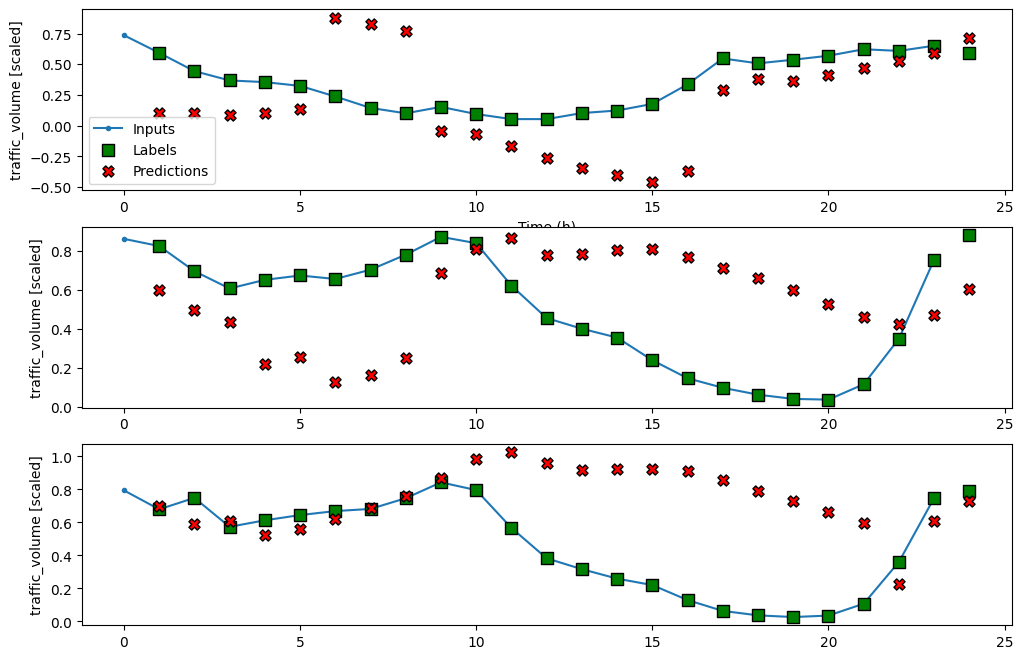

In [6]:
wide_window = DataWindow(input_width=24, label_width=24, shift=1,label_columns=['traffic_volume'])
wide_window.plot(linear)

Figura. Predicciones del volumen de tráfico utilizando el modelo lineal como modelo de un solo paso. Las predicciones (que se muestran como cruces) son bastante precisas, y algunas predicciones se superponen a los valores reales(que se muestran como cuadrados).

Nuestro modelo hace predicciones bastante buenas, ya que podemos observar cierta superposición entre las previsiones y los valores reales. Esperaremos hasta el final del capítulo para comparar el rendimiento de nuestros modelos con las líneas de base. Por ahora, pasemos a implementar los modelos lineales de varios pasos y lineales de varias salidas.

## Implementacion de un modelo lineal de varios pasos

Nuestro modelo lineal de un solo paso está construido, y ahora podemos extenderlo a un modelo lineal de varios pasos. Recuerde que en la situación de varios pasos, deseamos predecir las próximas 24 horas de datos utilizando una ventana de entrada de 24 horas de datos. Nuestro objetivo sigue siendo el volumen de tráfico.

Este modelo se parecerá mucho al modelo lineal de un solo paso, pero esta vez usaremos 24 horas de entrada y 24 horas de salida de predicciones. El modelo lineal de varios pasos se ilustra en la siguiente figura. Como puede ver, el modelo toma 24 horas de cada característica, las combina en una sola capa y genera un tensor que contiene el pronóstico para el las próximas 24 horas.

![Modelo-lineal-Multi-Step](fig/modelo_lineal_multi-step.png)

Figura. *El modelo lineal de varios pasos. Tomaremos 24 horas de cada función, las combinaremos en una sola capa y emitiremos predicciones de inmediato para las próximas 24 horas.*

Implementar el modelo es fácil, ya que nuestro modelo solo contiene una única capa densa. `Opcionalmente, podemos inicializar los pesos a 0, lo que hace que el procedimiento de entrenamiento sea un poco más rápido`. Luego compilamos y ajustamos el modelo antes de almacenar sus métricas de evaluación en ms_val_performance y ms_performance.

1. Inicializar los pesos a 0 hace que el entrenamiento sea un poco más rápido.


In [7]:
ms_linear = Sequential([Dense(1, kernel_initializer=tf.initializers.zeros)]) # 1

# creación de las ventanas
multi_window = DataWindow(input_width=24, label_width=24, shift=24,label_columns=['traffic_volume'])
history = compile_and_fit(ms_linear, multi_window) # compila

# diccionarios que guardan las métricas
ms_val_performance ={}
ms_performance ={}

# Entrenamiento
history = compile_and_fit(ms_linear, multi_window)
ms_val_performance['Linear'] = ms_linear.evaluate(multi_window.val)
ms_performance['Linear'] = ms_linear.evaluate(multi_window.test, verbose=0)

Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9616 - mean_absolute_error: 0.7113 - val_loss: 0.1032 - val_mean_absolute_error: 0.2607
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0726 - mean_absolute_error: 0.2238 - val_loss: 0.0435 - val_mean_absolute_error: 0.1784
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0447 - mean_absolute_error: 0.1726 - val_loss: 0.0597 - val_mean_absolute_error: 0.2084
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0486 - mean_absolute_error: 0.1581 - val_loss: 0.0430 - val_mean_absolute_error: 0.1569
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0411 - mean_absolute_error: 0.1492 - val_loss: 0.1572 - val_mean_absolute_error: 0.3713
Epoch 6/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1129 - mean_absolute_error: 0.2032 - val_loss: 0.0203 - val_mean_absolute_error: 0.1021
Epoch 7/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0935 - mean_absolute_error: 0.1972 - v

Acabamos de construir un modelo lineal de varios pasos. Es posible que no se sienta decepcionado, ya que el código es casi idéntico al modelo lineal de un solo paso. Esto se debe a nuestro trabajo al crear la clase DataWindow y al crear ventanas correctamente en nuestros datos. Con ese paso hecho, construir modelos se vuelve extremadamente fácil.

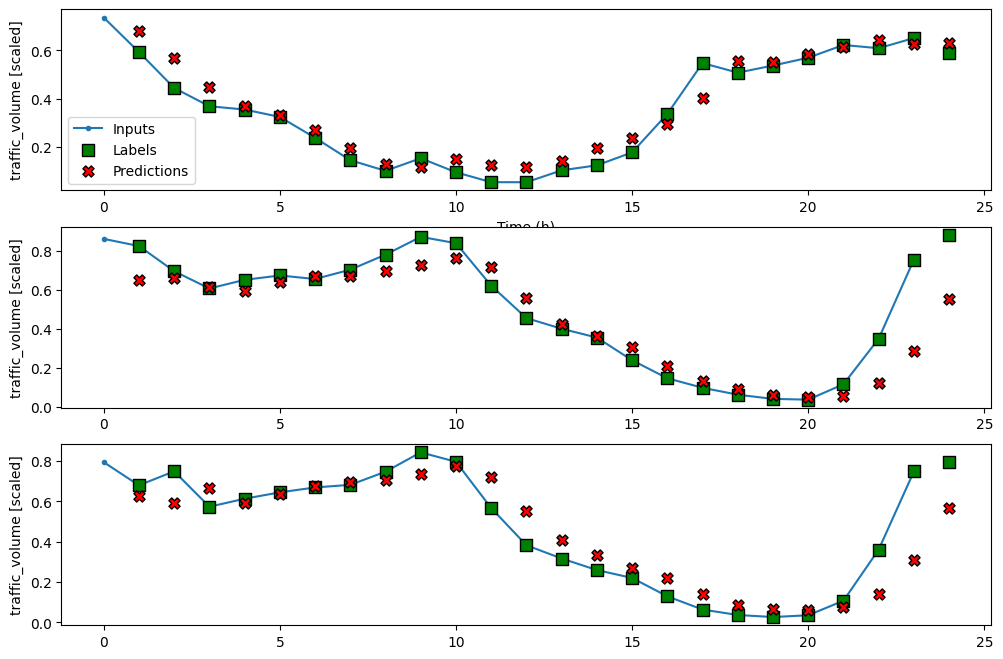

In [8]:
wide_window.plot(ms_linear)

A continuación implementaremos un modelo lineal de múltiples salidas

### Implementacion de un modelo lineal de multiples salidas

El modelo lineal de múltiples salidas devolverá predicciones para el volumen de tráfico y la temperatura. La entrada es el instante de tiempo presente, y las predicciones son para el siguiente instante de tiempo.

La arquitectura del modelo se muestra en la siguiente figura. Allí, puedes ver que nuestro modelo lineal de múltiples salidas tomará todas las características en t = 0, las combinará en una sola capa y producirá tanto la temperatura como el volumen de tráfico en el siguiente paso de tiempo.

![Multi-Step](fig/multi-step.png)

Figura. *Un modelo lineal de múltiples salidas. En este caso, el modelo toma el paso de tiempo actual de todas las entidades y produce un pronóstico de la temperatura y el volumen de tráfico en el próximo paso del tiempo.*

Hasta este momento, solo habíamos predicho el volumen de tráfico, lo que significa que solo teníamos un objetivo, por lo que usamos la capa Densa(unidades=1). En este caso, dado que debemos generar una predicción para dos objetivos, nuestra capa será Densa (unidades = 2). Como antes, entrenaremos el modelo y almacenaremos su rendimiento para compararlo más adelante con la línea de base y la red neuronal profunda.

1. Establecemos unidades iguales al número de objetivos que estamos prediciendo en la capa de salida.



In [9]:
mo_linear = Sequential([Dense(units=2)]) #1
# definamos las ventanas
mo_single_step_window = DataWindow(input_width=1, 
                                   label_width=1, 
                                   shift=1,label_columns=['temp','traffic_volume'])
# compilamos
history = compile_and_fit(mo_linear, mo_single_step_window)

# Diccionarios que almacenan las métricas
mo_val_performance ={}
mo_performance ={}

mo_val_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.val)
mo_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.test,verbose=0)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1044938.5000 - mean_absolute_error: 806.6336 - val_loss: 18961.1543 - val_mean_absolute_error: 124.3230
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1489.6283 - mean_absolute_error: 24.2254 - val_loss: 1.1851 - val_mean_absolute_error: 0.9359
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6888 - mean_absolute_error: 0.6792 - val_loss: 0.8393 - val_mean_absolute_error: 0.7778
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6771 - mean_absolute_error: 0.6752 - val_loss: 0.8323 - val_mean_absolute_error: 0.7747
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6742 - mean_absolute_error: 0.6738 - val_loss: 0.8568 - val_mean_absolute_error: 0.7856
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6726 - mean_absolute_error: 0.6727 - val_loss: 0.8540 - val_mean_absolute_error: 0.7844
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6692 - mean_absolute

Nuevamente, puede ver lo fácil que es crear un modelo de aprendizaje profundo en Keras, especialmente cuando tenemos la ventana de datos adecuada como entrada.

Con nuestros modelos lineales de un solo paso, varios pasos y varias salidas realizados, ahora podemos pasar a implementar una arquitectura más compleja: una red neuronal profunda.

# Implementacion de una red neuronal profunda

Con nuestros tres tipos de modelos lineales implementados, es hora de pasar a las redes neuronales profundas. Se ha demostrado empíricamente que agregar capas ocultas en las redes neuronales ayuda a lograr mejores resultados. Además, introduciremos una función de activación no lineal para capturar relaciones no lineales en los datos.

Los modelos lineales no tienen capas ocultas; el modelo tenía una capa de entrada y una capa de salida. En una red neuronal profunda (DNN), agregaremos más capas entre las capas de entrada y salida, llamadas capas ocultas. Esta diferencia en la arquitectura se resalta en la siguiente figura.

![Red-Profunda](fig/red_profunda.png)

Figura. Comparando un modelo lineal con una red neuronal profunda. En el modelo lineal, la capa de entrada está directamente conectada a una capa de salida que devuelve una predicción. Por lo tanto, solo se deriva una relación lineal. Una red neuronal profunda contiene capas ocultas. Estas capas permiten modelar relaciones no lineales entre las entradas y las predicciones, lo que generalmente resulta en mejores modelos.

La idea detrás de agregar capas a la red es que le da al modelo más oportunidades para aprender, lo que generalmente resulta en que el modelo generaliza mejor con datos no vistos, mejorando así su rendimiento. Por supuesto, con capas adicionales, el modelo necesariamente se entrena durante más tiempo y, por lo tanto, se supone que aprende mejor.

Cada círculo en una capa oculta representa una neurona, y cada neurona tiene una función de activación. El número de neuronas es igual al número de unidades que se pasa como argumento en la capa Dense en Keras. Por lo general, establecemos el número de unidades, o neuronas, como una potencia de 2, ya que es más eficiente computacionalmente; los cálculos en la CPU y la GPU se realizan en tamaños de lote que también son potencias de 2.

Antes de implementar una DNN, necesitamos abordar la función de activación en cada neurona de las capas ocultas. La función de activación define la salida de cada neurona en función de la entrada. Por lo tanto, si deseamos modelar relaciones no lineales, necesitamos utilizar una función de activación no lineal. `Ejemplos de funciones de activación no lineales son ReLU, softmax o tanh.`

En nuestro caso, utilizaremos la función de activación Rectified Linear Unit (ReLU). Esta función de activación no lineal básicamente devuelve ya sea la parte positiva de su entrada o 0, como se define en la siguiente ecuación.
$$f(x) = x^+ = max (0, x)$$

`Esta función de activación tiene muchas ventajas`, como una mejor propagación del gradiente, un cálculo más eficiente y la invariancia a la escala. Por todas estas razones, ahora `es la función de activación más utilizada en el aprendizaje profundo`, y `la utilizaremos siempre que tengamos una capa Densa que sea una capa oculta`.


## Implementar una red neuronal profunda como un modelo de un solo paso

Ahora estamos de vuelta al modelo de un solo paso, pero esta vez implementaremos una red neuronal profunda. La DNN toma las características en el tiempo actual para generar la predicción del volumen de tráfico en el siguiente intervalo de tiempo.

El modelo aún utiliza el modelo Secuencial, ya que apilaremos capas Densas para construir una red neuronal profunda. En este caso, utilizaremos dos capas ocultas con 64 neuronas cada una. Como se mencionó anteriormente, especificaremos que la función de activación sea ReLU. La última capa es la capa de salida, que en este caso solo devuelve un valor que representa la predicción del volumen de tráfico.

1. Primera capa oculta con 64 neuronas. Especificar que la función de activación sea ReLU.
2. La capa de salida tiene solo una neurona, ya que solo producimos un valor.

In [10]:
dense = Sequential([
    Dense(units=64, activation='relu'), #1
    Dense(units=64, activation='relu'), 
    Dense(units=1) #2
])

Con el modelo definido, ahora podemos compilarlo, entrenarlo y registrar su rendimiento para compararlo con la línea de base y el modelo lineal.

In [11]:
single_step_window = DataWindow(input_width=1, label_width=1, shift=1,label_columns=['traffic_volume'])
history = compile_and_fit(dense, single_step_window)
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6176.5327 - mean_absolute_error: 31.3907 - val_loss: 0.7052 - val_mean_absolute_error: 0.7847
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3041 - mean_absolute_error: 0.4837 - val_loss: 0.2136 - val_mean_absolute_error: 0.3834
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1260 - mean_absolute_error: 0.2918 - val_loss: 0.2926 - val_mean_absolute_error: 0.4655
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1374 - mean_absolute_error: 0.3013 - val_loss: 0.1266 - val_mean_absolute_error: 0.2906
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1418 - mean_absolute_error: 0.3048 - val_loss: 1.2689 - val_mean_absolute_error: 1.0902
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1850 - mean_absolute_error: 0.3406 - val_loss: 0.0682 - val_mean_absolute_error: 0.2216
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7286 - mean_absolute_error: 0.5630

Por supuesto, podemos echar un vistazo a las predicciones del modelo utilizando el método de gráfico

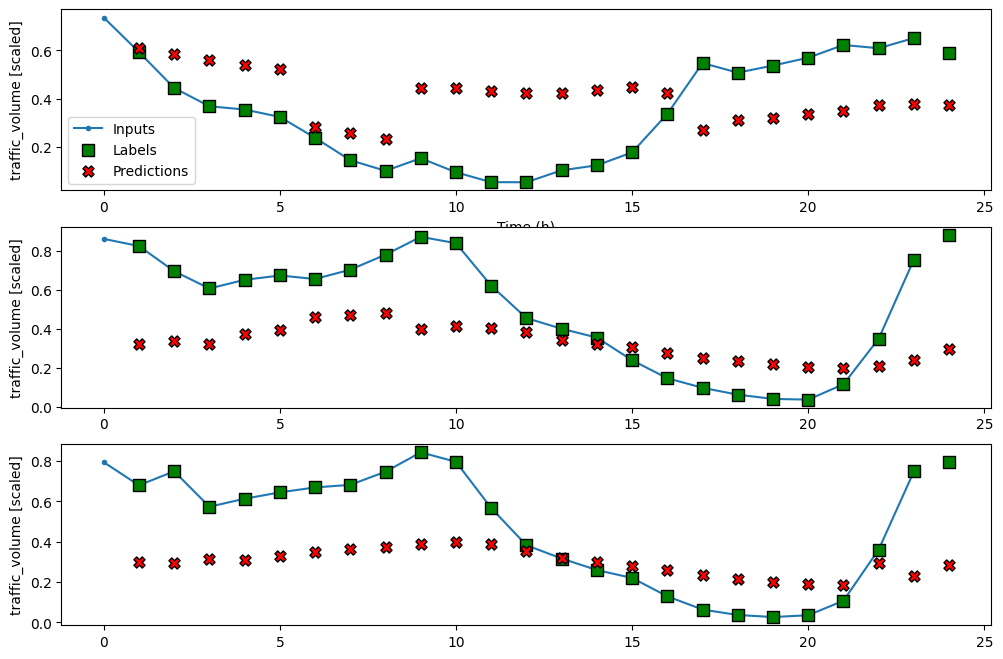

In [15]:
wide_window.plot(dense)

Comparémos el MAE de la DNN con el modelo lineal y la línea base que construimos en el capítulo 13.

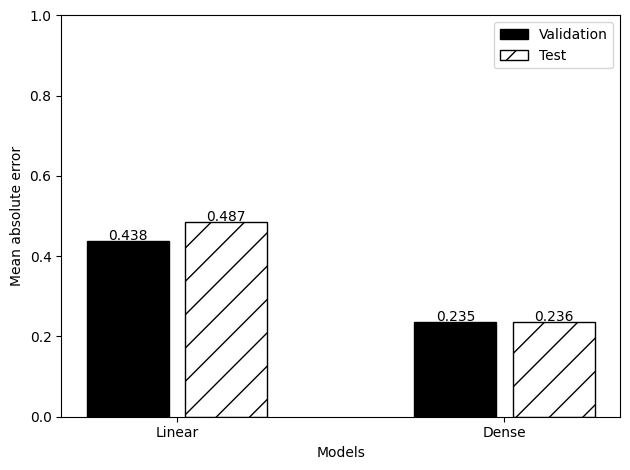

In [16]:
mae_val = [v[1] for v in val_performance.values()]
mae_test = [v[1] for v in performance.values()]
x = np.arange(len(performance))
fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black',label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black',hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')
for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')

plt.ylim(0, 1)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

Figura. *El MAE para todos los modelos de un solo paso hasta ahora. El modelo denso supera al modelo linear, ya que tiene el MAE más bajo.*

## Implementacion de una red neuronal profunda como modelo de varios pasos

Ahora implementemos una red neuronal profunda como un modelo de varios pasos. En este caso, queremos predecir las próximas 24 horas de volumen de tráfico en función de las últimas 24 horas de datos registrados.

Nuevamente usaremos dos capas ocultas con 64 neuronas cada una, y usaremos la función de activación ReLU. Dado que tenemos una ventana de datos con 24 horas de entrada, el modelo también generará 24 horas de predicciones; la capa de salida simplemente tiene una neurona porque solo estamos prediciendo el volumen de tráfico.


In [17]:
ms_dense = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

Luego compilaremos, entrenaremos el modelo y guardaremos su rendimiento para compararlo con los modelos lineal y de referencia.

In [18]:
history = compile_and_fit(ms_dense, multi_window)
ms_val_performance['Dense'] = ms_dense.evaluate(multi_window.val)
ms_performance['Dense'] = ms_dense.evaluate(multi_window.test, verbose=0)

Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 31.7175 - mean_absolute_error: 2.2985 - val_loss: 0.1373 - val_mean_absolute_error: 0.2941
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1209 - mean_absolute_error: 0.2892 - val_loss: 0.1319 - val_mean_absolute_error: 0.2885
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1585 - mean_absolute_error: 0.2913 - val_loss: 0.5903 - val_mean_absolute_error: 0.7105
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1156 - mean_absolute_error: 0.2845 - val_loss: 0.1423 - val_mean_absolute_error: 0.2988
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1014 - mean_absolute_error: 0.2698 - val_loss: 0.1364 - val_mean_absolute_error: 0.2925
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1365 - mean_absolute_error: 0.2930


Así, hemos construido un modelo de red neuronal profunda de varios pasos. Veamos qué modelo funcionó mejor para la tarea de varios pasos.

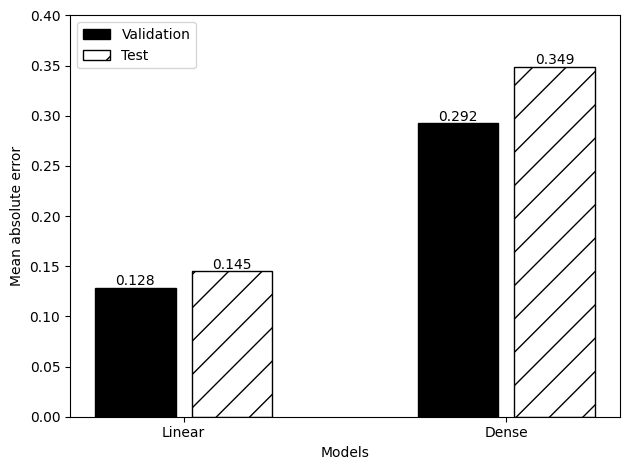

In [19]:
ms_mae_val = [v[1] for v in ms_val_performance.values()]
ms_mae_test = [v[1] for v in ms_performance.values()]
x = np.arange(len(ms_performance))
fig, ax = plt.subplots()
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black',label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black',hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')
for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')
for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')
plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=ms_performance.keys())
plt.legend(loc='best')
plt.tight_layout()